## https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/

In [1]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [2]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
Please enter the verification code: Access token retrieved correctly.


In [0]:
!mkdir -p drive
!google-drive-ocamlfuse drive

In [4]:
!pip install -q keras
import keras

Using TensorFlow backend.


In [5]:
!ls
import os
print(os.getcwd())

datalab  drive
/content


In [6]:
import os
os.chdir("drive/GPU")
!ls

149.png  data  GAN.py  graphs  mnist_cnn.py  output  __pycache__  utils.py


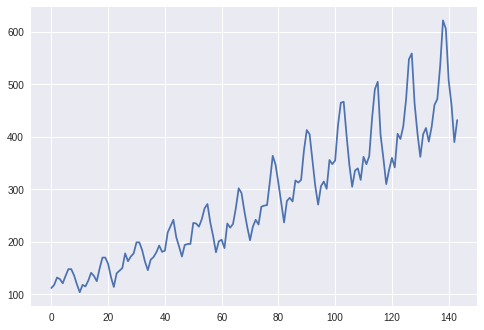

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
dataframe = pd.read_csv('./data/international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
plt.plot(dataframe)
plt.show()

In [0]:
import numpy as np
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [0]:
np.random.seed(7)

In [17]:
dataset = dataframe.values
dataset = dataset.astype("float32")
dataset[:5]

array([[112.],
       [118.],
       [132.],
       [129.],
       [121.]], dtype=float32)

In [0]:

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [38]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))
train[:5]

96 48


array([[0.01544401],
       [0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853]], dtype=float32)

In [0]:

# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [0]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [26]:
trainX[:5], trainY[:5]

(array([[0.01544401],
        [0.02702703],
        [0.05405405],
        [0.04826255],
        [0.03281853]], dtype=float32),
 array([0.02702703, 0.05405405, 0.04826255, 0.03281853, 0.05984557],
       dtype=float32))

In [37]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

trainX.shape
testX.shape
testX[:5]

array([[[0.4073359 ]],

       [[0.3803089 ]],

       [[0.48648646]],

       [[0.47104248]],

       [[0.484556  ]]], dtype=float32)

In [30]:
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
 - 1s - loss: 0.0413
Epoch 2/100
 - 1s - loss: 0.0201
Epoch 3/100
 - 1s - loss: 0.0145
Epoch 4/100
 - 1s - loss: 0.0131
Epoch 5/100
 - 1s - loss: 0.0121
Epoch 6/100
 - 1s - loss: 0.0111
Epoch 7/100
 - 1s - loss: 0.0102
Epoch 8/100
 - 1s - loss: 0.0093
Epoch 9/100
 - 1s - loss: 0.0081
Epoch 10/100
 - 1s - loss: 0.0071
Epoch 11/100
 - 1s - loss: 0.0062
Epoch 12/100
 - 1s - loss: 0.0053
Epoch 13/100
 - 1s - loss: 0.0045
Epoch 14/100
 - 1s - loss: 0.0038
Epoch 15/100
 - 1s - loss: 0.0033
Epoch 16/100
 - 1s - loss: 0.0029
Epoch 17/100
 - 1s - loss: 0.0026
Epoch 18/100
 - 1s - loss: 0.0024
Epoch 19/100
 - 1s - loss: 0.0022
Epoch 20/100
 - 1s - loss: 0.0022
Epoch 21/100
 - 1s - loss: 0.0021
Epoch 22/100
 - 1s - loss: 0.0021
Epoch 23/100
 - 1s - loss: 0.0021
Epoch 24/100
 - 1s - loss: 0.0021
Epoch 25/100
 - 1s - loss: 0.0020
Epoch 26/100
 - 1s - loss: 0.0021
Epoch 27/100
 - 1s - loss: 0.0020
Epoch 28/100
 - 1s - loss: 0.0020
Epoch 29/100
 - 1s - loss: 0.0020
Epoch 30/100
 - 1s - lo

Epoch 55/100
 - 1s - loss: 0.0021
Epoch 56/100
 - 1s - loss: 0.0020
Epoch 57/100
 - 1s - loss: 0.0020
Epoch 58/100
 - 1s - loss: 0.0020
Epoch 59/100
 - 1s - loss: 0.0020
Epoch 60/100
 - 1s - loss: 0.0020
Epoch 61/100
 - 1s - loss: 0.0021
Epoch 62/100
 - 1s - loss: 0.0020
Epoch 63/100
 - 1s - loss: 0.0020
Epoch 64/100
 - 1s - loss: 0.0020
Epoch 65/100
 - 1s - loss: 0.0020
Epoch 66/100
 - 1s - loss: 0.0020
Epoch 67/100
 - 1s - loss: 0.0020
Epoch 68/100
 - 1s - loss: 0.0021
Epoch 69/100
 - 1s - loss: 0.0020
Epoch 70/100
 - 1s - loss: 0.0021
Epoch 71/100
 - 1s - loss: 0.0020
Epoch 72/100
 - 1s - loss: 0.0020
Epoch 73/100
 - 1s - loss: 0.0020
Epoch 74/100
 - 1s - loss: 0.0021
Epoch 75/100
 - 1s - loss: 0.0021
Epoch 76/100
 - 1s - loss: 0.0020
Epoch 77/100
 - 1s - loss: 0.0021
Epoch 78/100
 - 1s - loss: 0.0019
Epoch 79/100
 - 1s - loss: 0.0022
Epoch 80/100
 - 1s - loss: 0.0020
Epoch 81/100
 - 1s - loss: 0.0020
Epoch 82/100
 - 1s - loss: 0.0020
Epoch 83/100
 - 1s - loss: 0.0020
Epoch 84/100
 

In [36]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

ValueError: ignored

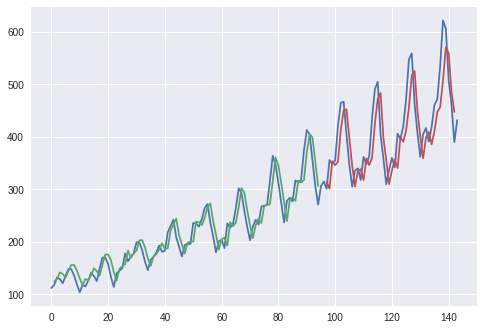

In [33]:

# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()